<a href="https://colab.research.google.com/github/shiernee/2023_AI_Workshop/blob/main/AI_Workshop_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Regression Introduction

Linear regression model is a good starting point for regression tasks. This model is popular because they can be fit quickly and are straightforward to interpret. You are already familiar with the simplest form of linear regression model (i.e., fitting a straight line to two-dimensional data), but such models can be extended to model more complicated data behavior.

In this chapter we will start with a quick walkthrough of the mathematics behind this well-known problem, before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

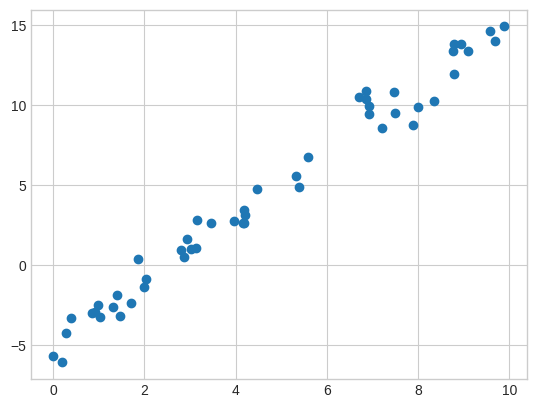

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, as shown in the following figure:

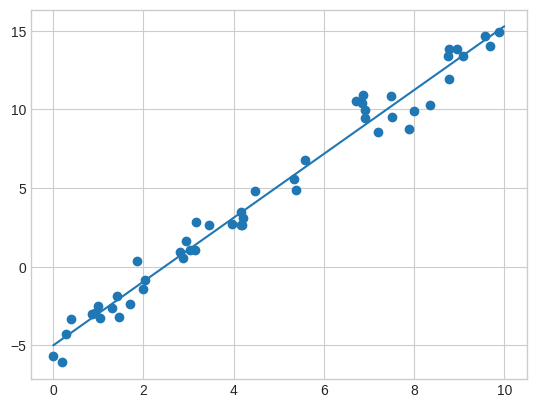

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the values used to generate the data, as we might hope.

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$

---

values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` to fit lines, planes, or hyperplanes to our data and visualize the
linear relationships between variables.

## Part 2: Weather Forecasting

In this part, we will focus on a case study for a weather prediction model. As usual, we need to import necessary libraries as such,

In [6]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go

# Data Preparation: Load dataset
This dataset contains:
1.  Historical 24hr-ahead forecasts from [NOAA's GFS weather model](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs); and
2.  Actual temperature data recorded at the [Max Planck Institute for Biogeochemistry in Jena, Germany](https://www.bgc-jena.mpg.de/wetter/).

Initially, we load the data and examine the forecast accuracy for 2019.

In [7]:
df = pd.read_csv('https://github.com/bytehub-ai/blog-examples/raw/master/data/jena-temperature-data.csv.gz', parse_dates=[0])
df = df.set_index(df.columns[0])
df.head()

,latitude,longitude,surface_temperature_forecast,actual,2m_temperature_forecast
Unnamed: 0,,,,,
2017-01-02 00:00:00,51.0,11.5,-3.000000,-2.28,-1.940002
2017-01-02 06:00:00,51.0,11.5,-1.600006,-0.51,-1.230011
2017-01-02 12:00:00,51.0,11.5,0.500000,1.37,0.470001
2017-01-02 18:00:00,51.0,11.5,-3.700012,-0.08,-2.739990
2017-01-03 00:00:00,51.0,11.5,-2.799988,-0.01,-2.019989


# Data Splitting: Train & Test

*   Train set: Data from 2017-2018
*   Test set: Data from 2019


In [8]:
# Train Set
df_train = df[df.index < pd.Timestamp('2019-01-01')].drop(columns=['longitude', 'latitude'])

# Test Set
df_test = df[df.index >= pd.Timestamp('2019-01-01')].drop(columns=['longitude', 'latitude'])

We can visualize the data based on our test set (data in 2019).

In [9]:
# Plot actual and forecast for 2019
traces = [
          go.Scatter(x=df_test.index, y=df_test['actual'], mode='lines', name='Actual'),
          go.Scatter(x=df_test.index, y=df_test['surface_temperature_forecast'], mode='lines', name='Surface forecast'),
          go.Scatter(x=df_test.index, y=df_test['2m_temperature_forecast'], mode='lines', name='2m forecast'),
]
fig = go.Figure(
    data=traces,
    layout={
        'title': 'Jena Temperature: Actual and Forecast',
        'yaxis': {'title': 'Temperature, °C'},
        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
    },
)
fig

Based on our visualization, we could the the error based on **surfaced error** and **2m forecast** in comparison with **actual** as our ground truth.

Plot the forecast error.

In [10]:
# Plot histograms of forecast error
traces = [
          go.Histogram(x=df_test['surface_temperature_forecast'] - df_test['actual'], name='Error on surface forecast', histnorm='probability'),
          go.Histogram(x=df_test['2m_temperature_forecast'] - df_test['actual'], name='Error on 2m forecast', histnorm='probability'),
]
fig = go.Figure(
    data=traces,
    layout={
        'title': 'Forecast Error',
        'xaxis': {'title': 'Error, °C'},
        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
    },
)
fig

Analyse the data with Root Mean Square (RMS) error.

In [11]:
# Calculate root-mean-squared (RMS) errors on forecasts
from sklearn.metrics import mean_squared_error

def rms_error(y_true, y_predicted):
  return mean_squared_error(y_true.flatten(), y_predicted.flatten()) ** 0.5

In [12]:
print(f'RMS Error on surface forecast {rms_error(df_test["actual"].values, df_test["surface_temperature_forecast"].values):.2f} °C')
print(f'RMS Error on 2m height forecast {rms_error(df_test["actual"].values, df_test["2m_temperature_forecast"].values):.2f} °C')

RMS Error on surface forecast 2.88 °C
RMS Error on 2m height forecast 2.05 °C


# Model Training: Linear Regression

Here we use a simple model (linear regression) to improve forecast accuracy for our specific forecasting problem. The model learns to improve the output of the GFS weather model as applied to the temperature measured in Jena. We use the time of day as an additional feature to help improve model performance.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Feature engineering: add time as cyclically-encoded variables
df_train = df_train.assign(
    sine_time=np.sin(2 * np.pi * df_train.index.hour / 24),
    cosine_time=np.cos(2 * np.pi * df_train.index.hour / 24),
)
df_test = df_test.assign(
    sine_time=np.sin(2 * np.pi * df_test.index.hour / 24),
    cosine_time=np.cos(2 * np.pi * df_test.index.hour / 24),
)

In [15]:
# Feature engineering: add forecast from previous timestep as feature
df_train = df_train.assign(
    lagged_surface=df_train['surface_temperature_forecast'].shift(1),
    lagged_2m=df_train['2m_temperature_forecast'].shift(1),
).dropna()
df_test = df_test.assign(
    lagged_surface=df_test['surface_temperature_forecast'].shift(1),
    lagged_2m=df_test['2m_temperature_forecast'].shift(1),
).dropna()

In [16]:
# Use GFS forecasts and engineered variables to predict actual temperature measurement
X_vars = df_train.columns.difference(['actual'])
y_vars = ['actual']

X_train = df_train[X_vars].values
y_train = df_train[y_vars].values
X_test = df_test[X_vars].values
y_test = df_test[y_vars].values

In [17]:
model_lr = LinearRegression()
model_lr.fit(X=X_train, y=y_train)

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# Model Evaluation

After training, we evaluate the model with RMS error.

In [18]:
y_predict_lr = model_lr.predict(X_test)
print(f'RMS Error on linear model forecast {rms_error(df_test["actual"].values, y_predict_lr):.2f} °C')

RMS Error on linear model forecast 1.77 °C


In [19]:
# Plot histograms of forecast error
traces = [
          go.Histogram(x=df_test['surface_temperature_forecast'] - df_test['actual'], name='Error on surface forecast', histnorm='probability'),
          go.Histogram(x=df_test['2m_temperature_forecast'] - df_test['actual'], name='Error on 2m forecast', histnorm='probability'),
          go.Histogram(x=y_predict_lr.flatten() - df_test['actual'], name='Error on ML-enhanced forecast', histnorm='probability'),
]
fig = go.Figure(
    data=traces,
    layout={
        'title': 'Forecast error',
        'xaxis': {'title': 'Error, °C'},
        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
    },
)
fig

In [20]:
# Bar chart of RMS errors
traces = [
          go.Bar(
              x=['Surface forecast', '2m height forecast', 'ML-enhanced forecast'],
              y=[
                 rms_error(df_test['actual'].values, df_test['surface_temperature_forecast'].values),
                 rms_error(df_test['actual'].values, df_test['2m_temperature_forecast'].values),
                 rms_error(df_test['actual'].values, y_predict_lr),
              ],
          ),
]
fig = go.Figure(
    data=traces,
    layout={
        'title': 'Forecast RMS error on each model',
        'yaxis': {'title': 'RMS Error, °C'},
        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
    },
)
fig

Based on the results, we could see that implementing linear regression could improve the RMS error.